<a href="https://colab.research.google.com/github/SaxenaKushagr/Netflix-Data-Analytics/blob/main/EDA_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = '/content/drive/MyDrive/EDA Netflix.csv'
df = pd.read_csv(data)

In [ ]:
                        '''Beginning by exploring the dataset'''
'''Understanding the structure of data, the Dtypes of variables available, and the general patterns'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
'''Descriptive Statistics about our dataset'''

df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
#As soon as we perform Exploratory and Descriptive analysis, we can now begin Data Cleaning.

In [ ]:
'''Let's drop any duplicate entries and check the shape of our dataset'''
df.drop_duplicates()
df.shape

(8807, 12)

In [ ]:
'''Let's find Null/Missing values in our dataset(Column-wise)'''
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
'''Total Number of Null values in our dataset'''
df.isnull().sum().sum()

4307

In [ ]:
'''We need to fill these missing values with the appropriate values, which enables us analyse better insights from our dataset'''
'''The reason to fill Null/Missing values is that we can't analyse the data without it'''

In [ ]:
df['director']=df['director'].fillna('Director not defined')

df['cast']=df['cast'].fillna('Cast not defined')

df['country']=df['country'].fillna('Country not defined')

df['date_added']=df['date_added'].fillna('Date not defined')

df['rating']=df['rating'].fillna('Rating not defined')

df['duration']=df['duration'].fillna('Duration not defined')

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
'''Before moving on to explore dataset, let's draw a HEATMAP of cleaned dataset'''
'''As all the Null/missing values has been handled, we can now analyse our dataset'''

<Axes: >

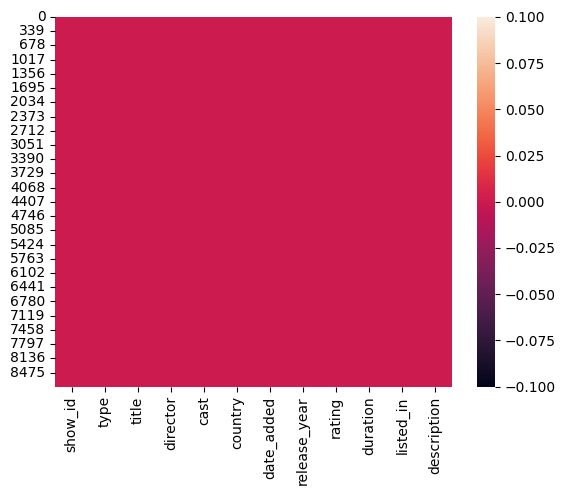

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
'''Question 1 - Create visualizations to represent the distribution of content over different genres.'''

# We can assume that 'listed_in' column contains genre information.
genre_counts = df['listed_in'].str.split(', ').explode().value_counts()

#Ploting Barplot using Plotly
fig = px.bar(x=genre_counts.index, y=genre_counts.values, labels={'x': 'Genre', 'y': 'Number of Titles'})
fig.update_layout(title='Distribution of Content Over Different Genres', xaxis_tickangle=45)
fig.show()


In [ ]:
'''Meaningful insights from Question 1'''

# 1. **Dominant Genres:** The bar chart clearly shows "International Movies"(2752 titles) and "Dramas(2427 titles)" are among the top genres.
# It indicates a significant portion of content falls under these categories.

# 2. **Potential Areas for Growth:** Identifying genres with lower representation like "TV Shows" & "Classic TV" could highlight areas for potential expansion or content acquisition.

In [ ]:
'''Question 2 - Visualize the distribution of content across release years.'''

# We can assume that 'release_year' column contains the release year information.
release_years = df['release_year'].value_counts().sort_index()

#Ploting Barplot using Plotly
fig = px.bar(x=release_years.index, y=release_years.values, labels={'x': 'Release Year', 'y': 'Number of Titles'})
fig.update_layout(title='Distribution of Content Across Release Years', xaxis_tickangle=45)
fig.show()

In [ ]:
'''Meaningful insights from Question 2'''

# 1. **Recent Content Dominance:** The bar chart shows a clear trend of increasing content volume in recent years,
 #peaking around 2019-2020. This suggests a focus on providing fresh content to viewers.

# 2. **Content Library Growth:** The upward trend also indicates a continuous expansion of the Netflix content library over time.

In [ ]:
'''Question 3 - Explore the geographical distribution of content.'''

#As we know 'country' column contains information about the country of origin.
country_counts = df['country'].str.split(', ').explode().value_counts()

# Selecting top 10 countries for better visualization.
top_10_countries = country_counts.head(10)

# Plotting Barplot using Plotly
fig = px.bar(x=top_10_countries.index, y=top_10_countries.values, labels={'x': 'Country', 'y': 'Number of Titles'})
fig.update_layout(title='Geographical Distribution of Content (Top 10 Countries)', xaxis_tickangle=45)
fig.show()

In [ ]:
'''Meaningful insights from Question 3'''

# 1. **Content Origin Diversity:** The bar chart reveals the top countries contributing to Netflix's content library.
# The US is the primary contributor of content on Netflix with 3,689 titles, followed by India(1046 titles) and UK(804 titles).

# 2. **Strategic Focus Areas:** Identifying countries with a high number of titles might indicate key markets for Netflix's content acquisition and production strategies.

# 3. **Emerging markets are contributing:** Countries like UK, Canada etc. are becoming significant content providers.

In [ ]:
'''Question 4 - If there's a temporal component, perform time series analysis to identify trends and patterns over time.'''

# Extracting year from 'date_added' column and counting content added each year.
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
content_added_yearly = df['year_added'].value_counts().sort_index()

# Plotting line chart using Plotly for time series analysis
fig = px.line(x=content_added_yearly.index, y=content_added_yearly.values, labels={'x': 'Year Added', 'y': 'Number of Titles Added'})
fig.update_layout(title='Content Addition Trend Over Time')
fig.show()



In [ ]:
'''Meaningful insights from Question 4'''

# 1. **Growth:** The line chart shows a significant increase in content added to Netflix from Year 2015 until around 2019, followed by a slight decrease in 2020/2021.
# This could indicate that either Netflix is potentially focusing on quality over quantity, or facing challenges in content acquisition.

# 2. **Seasonal Trends:** If available, analyzing monthly data could reveal seasonal patterns in content additions, which might be linked to viewer behavior.


In [ ]:
'''Question 5 - Analyze the distribution of content ratings.'''

# As we know that 'rating' column contains content ratings.
rating_counts = df['rating'].value_counts()

# Plotting bar chart using Plotly
fig = px.bar(x=rating_counts.index, y=rating_counts.values, labels={'x': 'Rating', 'y': 'Number of Titles'},
             category_orders={'x': ['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'TV-G', 'PG', 'G', 'NR', 'UR', 'NC-17']})
fig.update_layout(title='Distribution of Content Ratings', xaxis_tickangle=45)
fig.show()

In [ ]:
'''Meaningful insights from Question 5'''

# 1. **Mature Content Dominance:** The bar chart shows a giant portion of content is rated TV-MA (Mature Audience) and TV-14 (Parents Strongly Cautioned),
# indicating a focus on adult or older teen demographics.

# 2. **Family-Friendly Content:** There's a decent amount of content with ratings like TV-PG, TV-Y7, and TV-Y, catering to families and younger audiences.

# 3. **Content Strategy:** The distribution of ratings reflects Netflix's strategy to cater to a wide range of audience preferences.

In [ ]:
'''Question 6 - Explore the length of movies or TV Shows and identify any trends.'''

# Extracting duration information from 'duration' column.
# Assuming duration is in minutes for movies and number of seasons for TV shows.
df['duration_type'] = df['duration'].str.extract('(\d+)').astype(float)

# Separating movies and TV shows for analysis.
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Plotting histogram for movie durations using Plotly
fig_movies = px.histogram(movies, x='duration_type', nbins=30, labels={'duration_type': 'Movie Duration (minutes)'})
fig_movies.update_layout(title='Distribution of Movie Durations')
fig_movies.show()

# Plotting histogram for TV show durations using Plotly
fig_tv_shows = px.histogram(tv_shows, x='duration_type', nbins=20, labels={'duration_type': 'Number of Seasons'})
fig_tv_shows.update_layout(title='Distribution of TV Show Durations (Number of Seasons)')
fig_tv_shows.show()

In [ ]:
'''Meaningful insights from Question 6'''

# 1. **Movie Duration:** The histogram for movies shows a peak around 90-100 minutes, suggesting a preference for standard feature film lengths.
# There are also shorter and longer movies, providing variety.

# 2. There's a smaller but notable presence of shorter movies under 90 minutes.

# 2. **TV Show Seasons:** The histogram for TV shows indicates that a majority of shows have 1-3 seasons. This could reflect the challenges of maintaining viewer engagement over many seasons.


In [ ]:
'''Question 7 - Identify and present top-rated movies or TV shows based on user ratings.'''

# As we know that 'rating' column contains user ratings.
top_rated_movies = df[df['type'] == 'Movie'].sort_values('rating', ascending=False).head(10)
top_rated_tv_shows = df[df['type'] == 'TV Show'].sort_values('rating', ascending=False).head(10)

print("Top 10 Rated Movies:")
print(top_rated_movies[['title', 'rating']])

Top 10 Rated Movies:
                                                  title    rating
8790                      You Don't Mess with the Zohan        UR
7988                                           Sex Doll        UR
7058                                      Immoral Tales        UR
7290  LEGO Ninjago: Masters of Spinjitzu: Day of the...  TV-Y7-FV
7513                          Motu Patlu: King of Kings  TV-Y7-FV
7292                                       Leo the Lion  TV-Y7-FV
7317                Little Singham aur Kaal ka Mahajaal  TV-Y7-FV
6581                                       Dear Dracula  TV-Y7-FV
7494                           Monster High: Fright On!     TV-Y7
8602                      Tom and Jerry: The Magic Ring     TV-Y7


In [ ]:
print("\nTop 10 Rated TV Shows:")
print(top_rated_tv_shows[['title', 'rating']])


Top 10 Rated TV Shows:
                                  title    rating
7646      Oh No! It's an Alien Invasion  TV-Y7-FV
3695                   Rabbids Invasion     TV-Y7
3066                         Mia and Me     TV-Y7
3345                           The Deep     TV-Y7
3295                 Green Eggs and Ham     TV-Y7
3247          Trolls: The Beat Goes On!     TV-Y7
3246                  The Dragon Prince     TV-Y7
3148             What's New Scooby-Doo?     TV-Y7
3146  Scooby-Doo!: Mystery Incorporated     TV-Y7
3085                       Robot Trains     TV-Y7


In [ ]:
'''Question 8 - Analyze trends in the popularity of different genres over time.'''

# Extracting year from 'date_added' and creating a list of genres for each title.
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
df['genres'] = df['listed_in'].str.split(', ')

# Grouping by year and genre to count occurrences.
genre_trends = df.explode('genres').groupby(['year_added', 'genres'])['show_id'].count().reset_index(name='count')

# Selecting top 10 genres for better visualization.
top_genres = genre_trends['genres'].value_counts().head(10).index.tolist()
genre_trends_top = genre_trends[genre_trends['genres'].isin(top_genres)]

# Plotting line chart using Plotly to show trends for top genres
fig = px.line(genre_trends_top, x='year_added', y='count', color='genres',
              labels={'year_added': 'Year Added', 'count': 'Number of Titles', 'genres': 'Genre'})
fig.update_layout(title='Popularity Trends of Top Genres Over Time')
fig.show()


In [ ]:
'''Meaningful insights from question 8'''

# 1. **Genre Popularity Shifts:** The line chart shows how the popularity of different genres has changed over time.
# For example, "International Movies" and "Dramas" have seen a consistent rise in recent years.

# 2. **Emerging Trends:** We might observe genres that have gained popularity more recently, indicating potential shifts in viewer preferences.

# 3. **Content Strategy Alignment:** This analysis can help Netflix understand if their content strategy aligns with evolving viewer tastes and identify areas for potential genre expansion or reduction.


In [ ]:
'''Question 9 - Further explore the distribution of content across different countries and regions.'''

# As we know that 'country' column contains information about the country of origin.
country_counts = df['country'].str.split(', ').explode().value_counts()

# Selecting top 10 countries for better visualization in pie chart.
top_10_countries = country_counts.head(10)

# Plotting pie chart using Plotly
fig = px.pie(values=top_10_countries.values, names=top_10_countries.index, title='Geographical Distribution of Content (Top 10 Countries)')
fig.show()

# Now Grouping countries into Regions.
# For example:
region_mapping = {'United States':'North America', 'India':'Asia', 'United Kingdom':'Europe'}

df['region'] = df['country'].map(region_mapping)
region_counts = df['region'].value_counts()

# Plotting pie chart for regional distribution
fig = px.pie(values=region_counts.values, names=region_counts.index, title='Regional Distribution of Content')
fig.show()



In [ ]:
'''Meaningful insights from Question 9'''

# 1. **Global Reach:** The pie charts visualize the distribution of content across countries and regions.
# It highlights Netflix's efforts to cater to a global audience by sourcing content from various parts of the world.

# 2. **Key Markets:** Identifying countries or regions with a significant share of content can indicate key markets for Netflix's growth and investment.

# 3. **Content Localization Strategy:** A significant portion of content originates from North America, India and Europe.

# 4. **Expansion Opportunities:** Analyzing underrepresented regions could reveal potential areas for Netflix to expand its content library and reach new audiences.


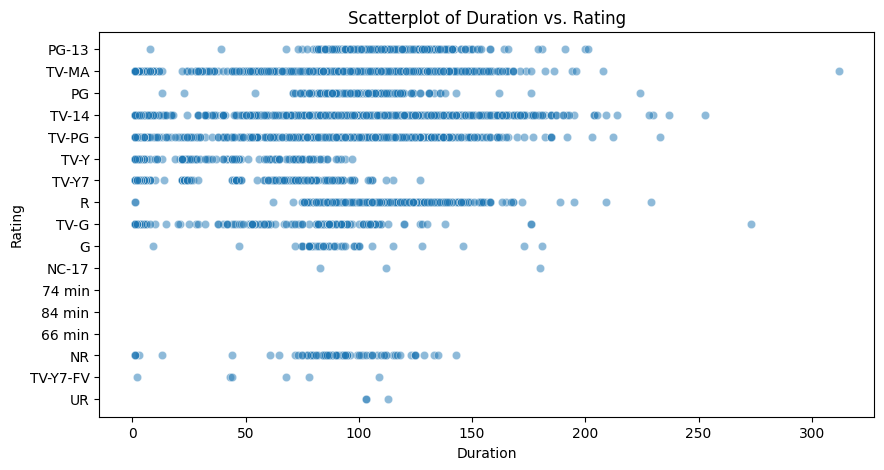

In [ ]:
'''Question 10 - Investigate potential correlations between variables ratings & duration'''

# As we know that 'rating' is a categorical variable and 'duration_type' is numerical

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='duration_type', y='rating', alpha=0.5)
plt.title('Scatterplot of Duration vs. Rating')
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.show()

In [ ]:
'''Meaningful insights from question 10'''

# 1. **No Clear Correlation:** The scatterplot doesn't show a strong linear relationship between duration and rating.
# This suggests that the length of a movie or TV show doesn't necessarily dictate its rating.

# 2. **Rating Distribution Across Durations:** We can observe that movies and TV shows of various durations receive a wide range of ratings.
# This indicates that factors other than duration play a significant role in determining user ratings.

# 3. **Further Analysis:** To gain deeper insights, we could explore correlations between rating and other variables like genre, release year, or country of origin.
# We could also use statistical tests to quantify the strength of any potential relationships.


In [ ]:
'''Question 11 - Evaluate the diversity of content by analyzing the number of unique genres and categories.'''

# Calculate the number of unique genres.
unique_genres = df['listed_in'].str.split(', ').explode().unique()
num_unique_genres = len(unique_genres)
print("Number of unique genres:", num_unique_genres)

# Assuming 'listed_in' column contains both genres and categories.
unique_categories = df['listed_in'].str.split(', ').explode().unique()
num_unique_categories = len(unique_categories)
print("Number of unique categories (including genres):", num_unique_categories)

Number of unique genres: 42
Number of unique categories (including genres): 42


In [ ]:
'''Meaningful insights from Question 11'''

# 1. **Content Diversity:** The number of unique genres and categories reflects the diversity of content available on Netflix.
# A higher number indicates a wider range of options for viewers.

# 2. **Niche Content:** The presence of numerous unique categories suggests that Netflix caters to various niche interests, potentially attracting a broader audience.

# 3. **Content Strategy:** This analysis can help Netflix evaluate the effectiveness of their content diversification strategy and identify areas for potential expansion.


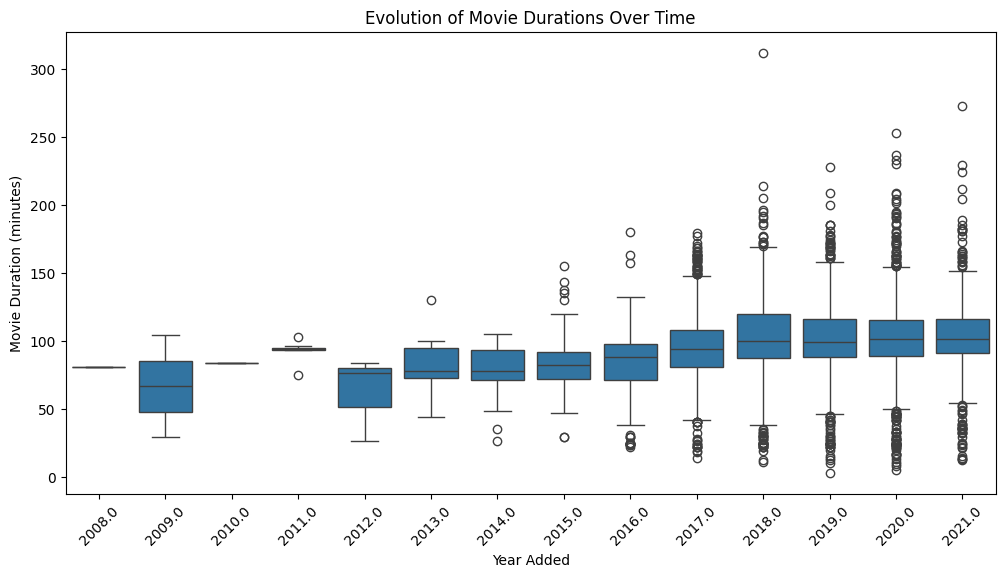

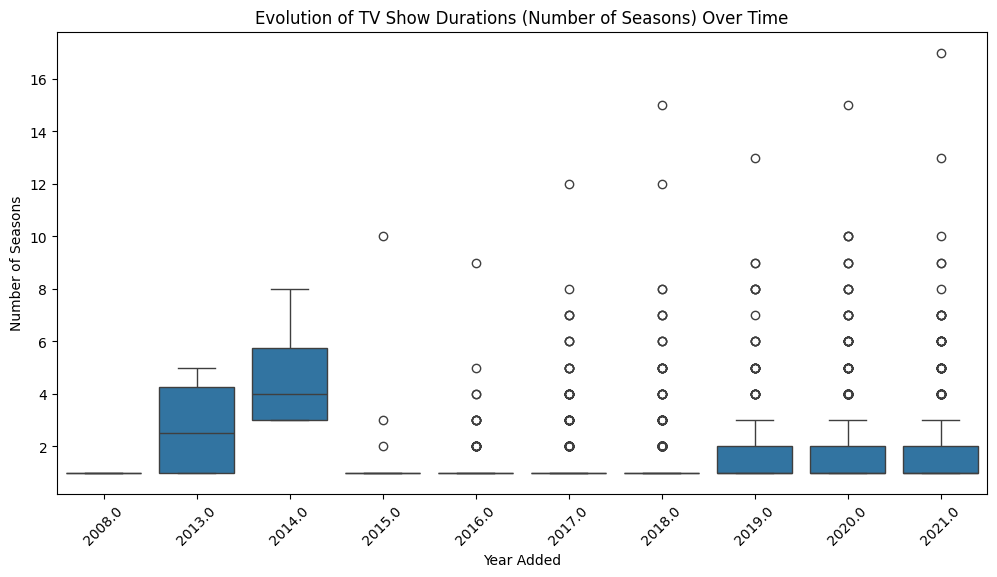

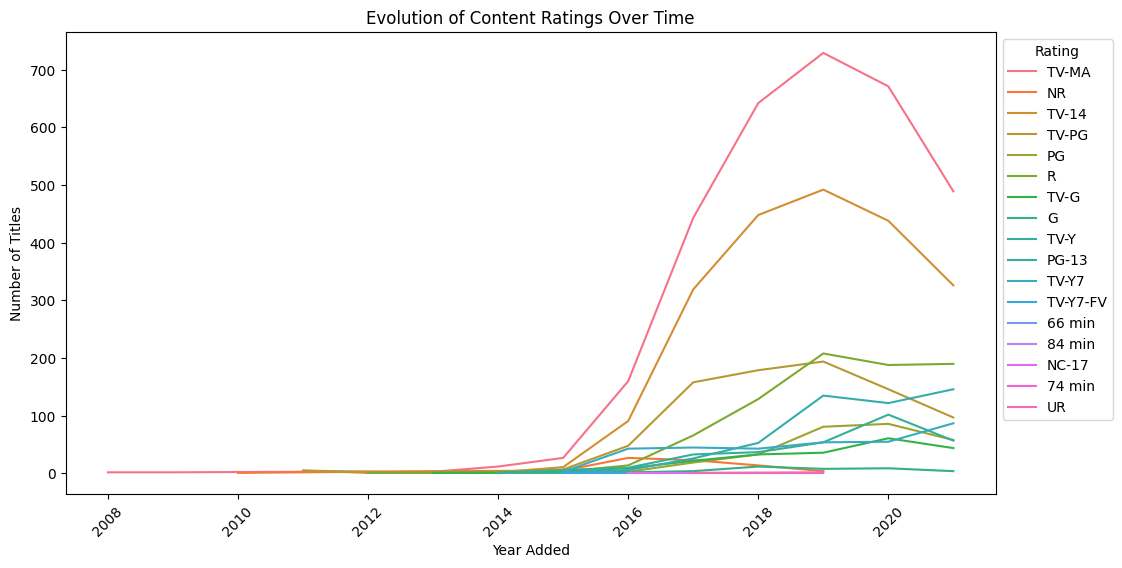

In [ ]:
'''Question 12 - Explore how the characteristics of content (e.g., duration, ratings) have evolved over the years.'''

# Evolution of Movie Durations Over Time.
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
movies = df[df['type'] == 'Movie']
plt.figure(figsize=(12, 6))
sns.boxplot(data=movies, x='year_added', y='duration_type')
plt.title('Evolution of Movie Durations Over Time')
plt.xlabel('Year Added')
plt.ylabel('Movie Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

# Evolution of TV Show Durations (Number of Seasons) Over Time.
tv_shows = df[df['type'] == 'TV Show']
plt.figure(figsize=(12, 6))
sns.boxplot(data=tv_shows, x='year_added', y='duration_type')
plt.title('Evolution of TV Show Durations (Number of Seasons) Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Seasons')
plt.xticks(rotation=45)
plt.show()

# Evolution of Content Ratings Over Time.
rating_trends = df.groupby(['year_added', 'rating'])['show_id'].count().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=rating_trends, x='year_added', y='count', hue='rating')
plt.title('Evolution of Content Ratings Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Rating', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
'''Meaningful insights from Question 12'''

# 1. **Movie Duration Trends:** The box plots for movie durations show how the distribution of movie lengths has changed over time.
# We might observe a trend towards shorter movies in recent years, or a wider range of durations being offered.

# 2. **TV Show Season Trends:** Similarly, the box plots for TV show durations (number of seasons) reveal trends in the length of TV series.
# We might see a shift towards shorter series, or a greater variety in the number of seasons offered.

# 3. **Rating Trends:** The line chart for content ratings shows how the distribution of ratings has evolved over time.
# We might observe an increase in the proportion of mature content, or a more balanced distribution across different rating categories.

# 4. **Content Strategy Adaptation:** These analyses provide insights into how Netflix's content strategy has adapted to changing viewer preferences and industry trends.
# It can help them identify areas for potential adjustments to their content acquisition and production strategies.


In [ ]:
'''FINAL WORDINGS - Summarize the key findings, draw conclusions, and provide recommendations based on the insights gained from the analysis'''

'''
Key Findings:

1. Content Distribution:
    - Dominant genres: International Movies, Dramas
    - Recent content dominance: Peak content volume around 2019-2020
    - Geographical distribution: US, India, UK as major contributors
    - Content ratings: Majority rated TV-MA and TV-14

2. Trends and Patterns:
    - Content addition: Significant increase until 2019, slight decrease in 2020/2021
    - Movie durations: Peak around 90-100 minutes
    - TV show durations: Majority with 1-3 seasons
    - Genre popularity: Rise of "International Movies" and "Dramas"
    - Regional distribution: North America, India, and Europe as major content sources

3. Correlations and Diversity:
    - No strong correlation between duration and rating
    - High number of unique genres and categories indicate diverse content library

4. Evolution of Content:
    - Potential trend towards shorter movies in recent years
    - Greater variety in TV show durations
    - Possible increase in the proportion of mature content


Conclusions:

- Netflix caters to a global audience with diverse content, focusing on adult and older teen demographics.
- The platform continuously expands its content library, primarily with recent releases.
- Strategic focus on key markets like the US, India, and UK.
- Content strategy adapts to evolving viewer preferences, with a potential shift towards shorter formats.


Recommendations:

1. Content Diversification:
    - Explore genres with lower representation (e.g., "TV Shows", "Classic TV") for potential expansion.
    - Consider increasing content from underrepresented regions to reach new audiences.

2. Content Strategy Refinement:
    - Continue monitoring genre popularity trends to align content acquisition and production with viewer preferences.
    - Evaluate the impact of shorter movie and TV show formats on viewer engagement.

3. Data-Driven Decision Making:
    - Leverage further analysis (e.g., correlations between rating and other variables) to inform content decisions.
    - Utilize user ratings and feedback to personalize content recommendations and improve user experience.

4. Continuous Monitoring and Adaptation:
    - Stay abreast of industry trends and viewer behavior to proactively adjust content strategies.
    - Regularly evaluate the effectiveness of content initiatives and make data-driven adjustments.
'''

In [ ]:
                                                           #'''THANK YOU FOR YOUR VALUABLE TIME'''#

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

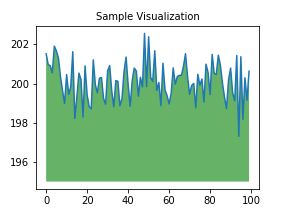

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
